In [2]:
import pandas as pd 

data = pd.read_csv('data/annotations.csv', delimiter = '\t')

In [3]:
data

,attachment_id,text,user_id,height,width,length,train
0,44e8d2a0-7e01-450b-90b0-beb7400d2c1e,Ё,185bd3a81d9d618518d10abebf0d17a8,1920,1080,76.0,True
1,df5b08f0-41d1-4572-889c-8b893e71069b,А,185bd3a81d9d618518d10abebf0d17a8,1920,1080,40.0,True
2,17f53df4-c467-4aff-9f48-20687b63d49a,Р,185bd3a81d9d618518d10abebf0d17a8,1920,1080,57.0,True
3,e3add916-c708-4339-ad98-7e2740be29e9,Е,185bd3a81d9d618518d10abebf0d17a8,1920,1080,64.0,True
4,bd7272ed-1850-48f1-a2a8-c8fed523dc37,Ч,185bd3a81d9d618518d10abebf0d17a8,1920,1080,84.0,True
...,...,...,...,...,...,...,...
20395,nodca88242-2bc7-4a77-9d14-103aa1dacbd6,no_event,0041ec866777f12c384b64d8cd636277,1920,1080,42.0,False
20396,no7a7812b1-ae64-4402-9ebc-5b947edbd021,no_event,f5b82a9c82f6d870ec253e4c3fa96d83,1280,720,32.0,False
20397,no62a4df76-b48d-4f61-b6e8-bc4a1eb0cb61,no_event,4299b8ccf39ace57287b463fbe4a489b,1920,960,32.0,False
20398,no388a3f7c-3594-4332-bc78-b5b53190301d,no_event,c80b4e57f158f28299b2a89694c42329,1920,1080,41.0,False


## Исследуем сколько различных жестов есть в датасете

In [4]:
data['text'].value_counts()

text
no_event        400
восемьдесят      20
хороший          20
тот              20
шум              20
               ... 
мотивировать     20
вдохновлять      20
непреклонный     20
рассердиться     20
сказать          20
Name: count, Length: 1001, dtype: int64

### Всего у нас 1000 классов жестов и 1 класс, отвечающий за отстуствие жеста. Посчитаем количество слов в жестах и построим распределение.

In [5]:
unique_texts = data['text'].unique()

# Не учитываем пустое значение
unique_texts = unique_texts[unique_texts != 'no_event']

unique_word_count = []

for text in unique_texts:
    word_count = len(str(text).split())
    unique_word_count.append({'text': text, 'word_count': word_count})

unique_word_count_df = pd.DataFrame(unique_word_count)

unique_word_count_df

,text,word_count
0,Ё,1
1,А,1
2,Р,1
3,Е,1
4,Ч,1
...,...,...
995,продление,1
996,башенные часы,2
997,в то время как,4
998,время 11 часов,3


In [6]:
unique_word_count_df['word_count'].value_counts()

word_count
1    932
2     45
3     18
4      4
7      1
Name: count, dtype: int64

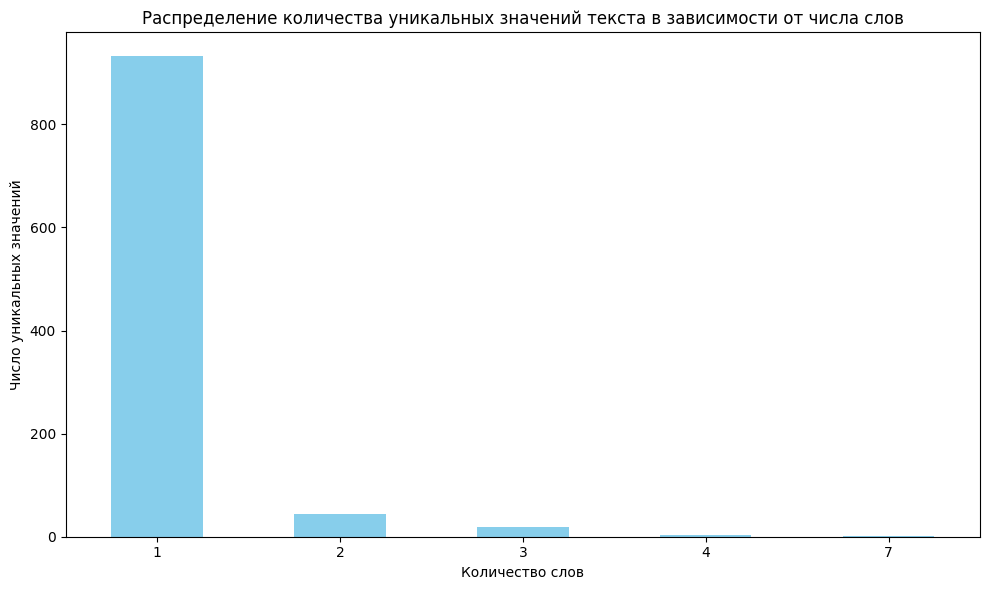

In [7]:
import matplotlib.pyplot as plt

word_count_counts = unique_word_count_df['word_count'].value_counts()

plt.figure(figsize=(10, 6))
word_count_counts.sort_index().plot(kind='bar', color='skyblue')

plt.title('Распределение количества уникальных значений текста в зависимости от числа слов')
plt.xlabel('Количество слов')
plt.ylabel('Число уникальных значений')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Из данных видно, что большая часть жестов состоит из 1-го слова, но например есть жест, состоящий из 7-и слов.

In [8]:
unique_word_count_df[unique_word_count_df['word_count'] == 7]

,text,word_count
878,время от 0 ночи до 12 дня,7


## Построим распределение расширений видео

In [9]:
video_resolution_counts = data.groupby(['height', 'width']).size().reset_index(name='video_count')

video_resolution_counts

,height,width,video_count
0,720,1280,1910
1,720,1440,5
2,880,1920,2
3,886,1920,8
4,920,1920,7
5,1080,1440,1
6,1080,1920,689
7,1088,1088,1
8,1190,1920,1
9,1234,1920,1


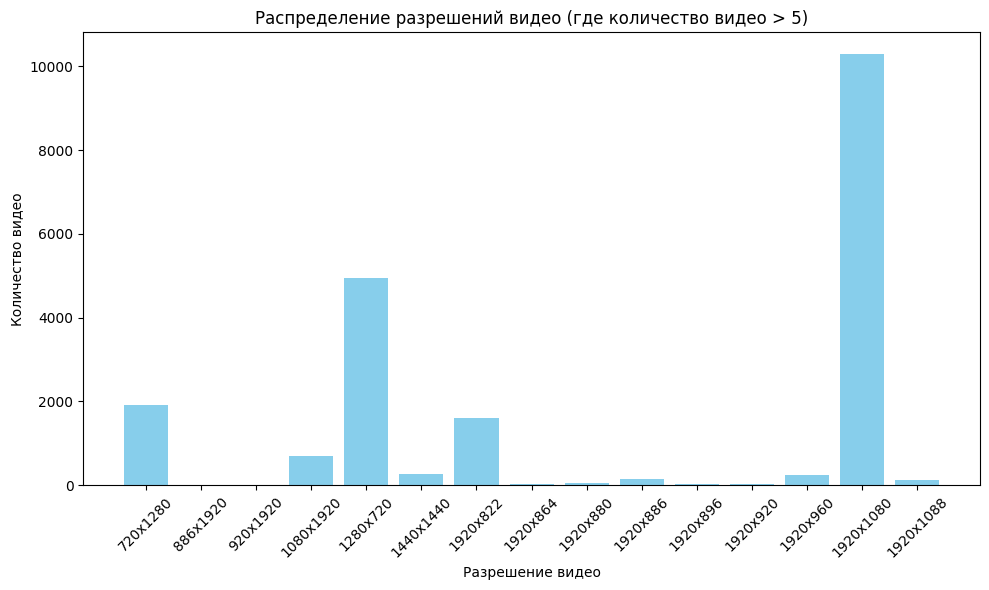

In [10]:
filtered_resolutions = video_resolution_counts[video_resolution_counts['video_count'] > 5]

plt.figure(figsize=(10, 6))
plt.bar(range(len(filtered_resolutions)), filtered_resolutions['video_count'], color='skyblue')

plt.xticks(range(len(filtered_resolutions)), [f"{h}x{w}" for h, w in zip(filtered_resolutions['height'], filtered_resolutions['width'])], rotation=45)
plt.xlabel('Разрешение видео')
plt.ylabel('Количество видео')

plt.title('Распределение разрешений видео (где количество видео > 5)')

plt.tight_layout()
plt.show()

## Найдем среднюю и медиану длины видео

In [11]:
print(f"Mean video length: {data['length'].mean()}")
print(f"Median video length: {data['length'].median()}")

Mean video length: 50.32171568627451
Median video length: 47.0
